<a href="https://colab.research.google.com/github/aghapygad336/Image-Segmentation/blob/master/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from urllib.request import urlretrieve
import cv2
import os
import glob
import pandas as pd

In [149]:
if not os.path.isfile('BSR_bsds500.tgz'):
    urlretrieve('http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz','BSR_bsds500.tgz')
if not os.path.isfile('content/BSR_bsds500.tgz'):
    !apt-get install p7zip-full
    !p7zip -d BSR_bsds500.tgz
    !tar -xvf BSR_bsds500.tgz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/bin/p7zip: BSR_bsds500.tgz: unknown suffix
BSR/
BSR/documentation/
BSR/documentation/Arbelaez_Maire_Fowlkes_Malik_TPAMI2010.pdf
BSR/bench/
BSR/bench/source/
BSR/bench/source/match.hh
BSR/bench/source/Matrix.cc
BSR/bench/source/Timer.cc
BSR/bench/source/csa_types.h
BSR/bench/source/csa.cc
BSR/bench/source/correspondPixels.cc
BSR/bench/source/build.sh
BSR/bench/source/match.cc
BSR/bench/source/Sort.hh
BSR/bench/source/csa_defs.h
BSR/bench/source/Timer.hh
BSR/bench/source/Exception.cc
BSR/bench/source/String.cc
BSR/bench/source/Array.hh
BSR/bench/source/kofn.hh
BSR/bench/source/Random.hh
BSR/bench/source/Exception.hh
BSR/bench/source/.gitignore
BSR/bench/source/kofn.cc
BSR/bench/source/build.m
BSR/bench/source/Random.cc
BSR/bench/source/Point.hh
BSR/bench/source/README
B

Image Dimension    :  (321, 481, 3)
Image Height       :  321
Image Width        :  481
Number of Channels :  3
Number of Pixels   :  154401


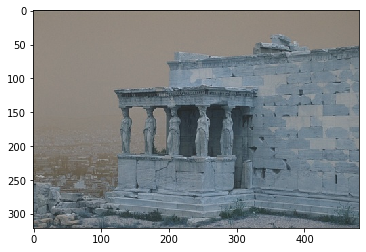

In [150]:
import numpy as np
from os import listdir
from os.path import isfile, join
import cv2

imagesFile_path = "BSR/BSDS500/data/images/train/"
imagesFile = [f for f in listdir(imagesFile_path) if isfile(join(imagesFile_path, f)) and f.endswith(".jpg")]
sortedImgfiles=sorted(imagesFile)


data = []

for i in range(len(sortedImgfiles)):
    testPlot=imagesFile_path+sortedImgfiles[i]
    img = cv2.imread(testPlot, cv2.IMREAD_UNCHANGED)

# get dimensions of image
    dimensions = img.shape
# height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]
    numberTotalPixels=height*width
    data.append(img)
    mydata = np.array(data)

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)
print('Number of Pixels   : ',numberTotalPixels)
plt.imshow(mydata[94])
plt.show()


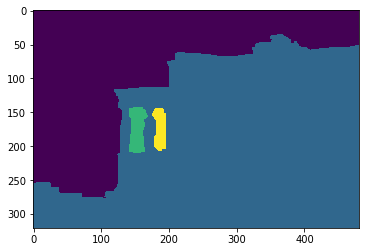

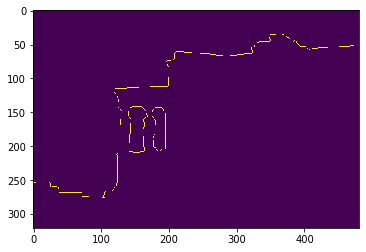

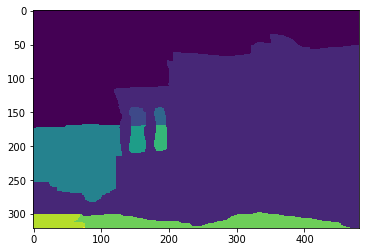

In [151]:
import scipy.io
groundTruth_path = "BSR/BSDS500/data/groundTruth/train/"
groundTruthFile = [f for f in listdir(groundTruth_path) if isfile(join(groundTruth_path, f)) and f.endswith(".mat")]
sortedGroundTruthFile=sorted(groundTruthFile)
testPlot_=groundTruth_path+sortedGroundTruthFile[94]
matContent=scipy.io.loadmat((testPlot_)) #var type is dictionary
gt=matContent['groundTruth'][0][0][0][0][0] #getting the ground-thruth number
plt.imshow(gt)
plt.show()
gt1=matContent['groundTruth'][0][0][0][0][1] #getting the ground-thruth number
plt.imshow(gt1)
plt.show()
gt2=matContent['groundTruth'][0][1][0][0][0] #getting the ground-thruth number
plt.imshow(gt2)
plt.show()


 ***Color Quantization*** is the process of reducing number of colors in an image. One reason to do so is to reduce the memory. Sometimes, some devices may have limitation such that it can produce only limited number of colors. In those cases also, color quantization is performed. Here we use **k-means clustering for color quantization**. italicized text

**`K-Means`**

In [152]:
from collections import defaultdict
from random import uniform
from math import sqrt



def point_avg(points):
  
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
   
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
  
    assignments = []
    for point in data_points:
        shortest = 20000000 # positive infinity
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if val < shortest:
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


def distance(a, b):

    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k):

    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            
            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers


def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)
    return assignments, dataset

import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

imagesFile_path = "BSR/BSDS500/data/images/train/"
imagesFile = [f for f in listdir(imagesFile_path) if isfile(join(imagesFile_path, f)) and f.endswith(".jpg")]
sortedImgfiles=sorted(imagesFile)

img=imagesFile_path+sortedImgfiles[94]
scale_percent = 80 # percent of original size
img = cv2.imread(img)

width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

Z = resized.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)
print("go to KMEANS")
a_clusters,b_data=(k_means(Z, 5))




go to KMEANS


In [153]:
print(type(b_data))
len(b_data)
a_new = np.array(a_clusters)
print(np.unique(a_new))

<class 'numpy.ndarray'>
[0 1 2 3 4]
